In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('stircom.csv')
df.head(5)  

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


In [3]:
df.info()  # checking the various columns and their respective datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

In [4]:
df.shape # checking the number of training examples and features (training instances, features)

(50662, 20)

## Goal : explore numerical values 

In [5]:
df.describe()

,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,5.066200e+04,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,5.502871e+07,40.979373,13.991210,3.005093,15.768525,2.713217,42.644408,0.640283
std,2.598596e+07,10.919324,30.899163,1.409003,8.347083,3.052227,102.238078,2.358029
min,1.000073e+07,18.000000,-80.190000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,3.249964e+07,32.000000,0.820000,2.000000,8.000000,1.000000,-1.000000,0.000000
50%,5.501127e+07,39.000000,4.720000,3.000000,16.000000,2.000000,-1.000000,0.000000
75%,7.748809e+07,48.000000,14.950000,4.000000,21.000000,3.000000,-1.000000,0.000000
max,9.999952e+07,95.000000,984.170000,5.000000,31.000000,63.000000,871.000000,275.000000


In [6]:
df.isnull().sum()  # checking the number of missing values with respect to each feature

ID                                           0
town                                         0
country                                      0
age                                          0
job                                          0
married                                      0
education                                    0
arrears                                      0
current_balance                              0
housing                                      0
has_tv_package                               0
last_contact                                 0
conn_tr                                      0
last_contact_this_campaign_day               0
last_contact_this_campaign_month             0
this_campaign                                0
days_since_last_contact_previous_campaign    0
contacted_during_previous_campaign           0
outcome_previous_campaign                    0
new_contract_this_campaign                   0
dtype: int64

In [7]:
[features for features in df.columns if df[features].isnull().sum() > 0]

[]

## This verifies that there are no missing values in any of the features

In [8]:
# cheching if there are any duplicates
df.duplicated().sum()

0

In [9]:
# checking the number of towns there are and how they are being represented
df.town.value_counts()

London             3241
Birmingham         2383
Glasgow            1991
Bristol            1693
Liverpool          1591
                   ... 
Southend-on-Sea     375
Blackburn           373
Southport           372
Bedford             367
Stevenage           360
Name: town, Length: 101, dtype: int64

In [10]:
# we can store the town names of townns and the number of customers in there in variables 
town_names = df.town.value_counts().index
town_values = df.town.value_counts().values

([<matplotlib.patches.Wedge at 0x15c37ea0730>,
 [Text(0.7354371867355677, 0.8180049782039678, 'London'),
  Text(-0.7275732644087305, 0.8250073605233008, 'Birmingham'),
  Text(-1.0560741915863237, -0.30774551477689027, 'Glasgow'),
  Text(-0.3607443605515457, -1.0391648119188104, 'Bristol'),
  Text(0.5422596529413632, -0.9570551022756801, 'Liverpool'),
  Text(1.0435194473030174, -0.3479470693947653, 'Manchester')],
 [Text(0.40114755640121874, 0.44618453356580057, '26.69%'),
  Text(-0.3968581442229439, 0.4500040148308913, '19.62%'),
  Text(-0.5760404681379947, -0.16786118987830378, '16.40%'),
  Text(-0.19676965120993398, -0.5668171701375329, '13.94%'),
  Text(0.29577799251347087, -0.5220300557867346, '13.10%'),
  Text(0.5691924258016458, -0.18978931057896284, '10.24%')])

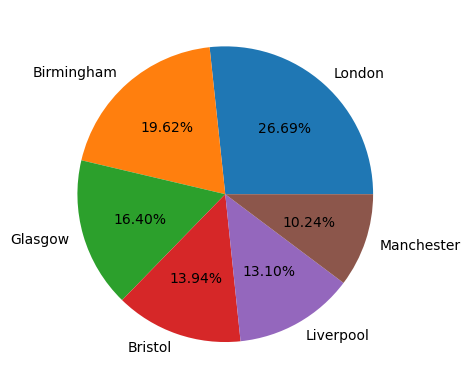

In [11]:
# we can use a piechart to visualize the top 6 towns with many customers
plt.pie(town_values[:6], labels=town_names[:6], autopct='%1.2f%%')

## It can be observed that among the top six towns with many customers London has the large number of customers.

# Pandas profiling

In [19]:
from ydata_profiling import ProfileReport

In [20]:
p_report = ProfileReport(df, title='Profile Report')
p_report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]